In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [33]:
# load dataset 
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [34]:
# visualize torch vector and sample prediction

import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

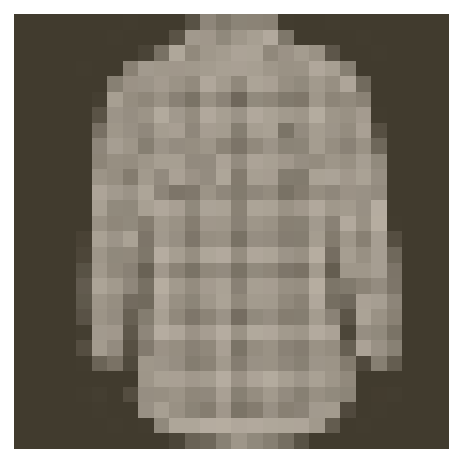

In [35]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [129]:
class Fashion(nn.Module):
    
    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super(Fashion, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.bn1 = nn.BatchNorm1d(400) # Batcn Norm for the first layer
        self.fc2 = nn.Linear(400, 200)
        self.bn2 = nn.BatchNorm1d(200) # Batcn Norm for the secon layer
        self.fc3 = nn.Linear(200, 100)
        self.bn3 = nn.BatchNorm1d(100)  # Batcn Norm for the third layer
        self.out = nn.Linear(100, 10)
        self.do  = nn.Dropout(0.2, inplace=True)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = F.relu(self.bn1(self.do(self.fc1(x))))
        x = F.relu(self.bn2(self.do(self.fc2(x))))
        x = F.relu(self.bn3(self.do(self.fc3(x))))
        return self.out(x)

model = Fashion()
model

Fashion(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (bn2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (bn3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
  (do): Dropout(p=0.2, inplace=True)
)

In [141]:

#images, labels = next(iter(testloader))
#images.resize_(images.shape[0], 1, 784)
#logit = model.forward(images[0,:])
#ps = F.softmax(logit, dim =1)
#print(ps)
#view_classify(images[0].view(1, 28, 28), ps)

In [68]:
optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()

In [69]:
# training loop

epochs = 5
print_every = 40

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

Epoch: 1/5
	Iteration: 0	 Loss: 0.0576
	Iteration: 40	 Loss: 1.9812
	Iteration: 80	 Loss: 1.9419
	Iteration: 120	 Loss: 1.9051
	Iteration: 160	 Loss: 1.8912
	Iteration: 200	 Loss: 1.9004
	Iteration: 240	 Loss: 1.8821
	Iteration: 280	 Loss: 1.8953
	Iteration: 320	 Loss: 1.8622
	Iteration: 360	 Loss: 1.8979
	Iteration: 400	 Loss: 1.8940
	Iteration: 440	 Loss: 1.8649
	Iteration: 480	 Loss: 1.8774
	Iteration: 520	 Loss: 1.8713
	Iteration: 560	 Loss: 1.9016
	Iteration: 600	 Loss: 1.8944
	Iteration: 640	 Loss: 1.9490
	Iteration: 680	 Loss: 2.0314
	Iteration: 720	 Loss: 2.0418
	Iteration: 760	 Loss: 2.0246
	Iteration: 800	 Loss: 2.0129
	Iteration: 840	 Loss: 1.9585
	Iteration: 880	 Loss: 2.0009
	Iteration: 920	 Loss: 2.0525
Epoch: 2/5
	Iteration: 0	 Loss: 0.0471
	Iteration: 40	 Loss: 1.9753
	Iteration: 80	 Loss: 1.9868
	Iteration: 120	 Loss: 1.9674
	Iteration: 160	 Loss: 1.9873
	Iteration: 200	 Loss: 2.1049
	Iteration: 240	 Loss: 2.0656
	Iteration: 280	 Loss: 2.0126
	Iteration: 320	 Loss: 2.0

tensor([[0.0853, 0.0853, 0.0853, 0.2320, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853,
         0.0853]], grad_fn=<SoftmaxBackward0>)


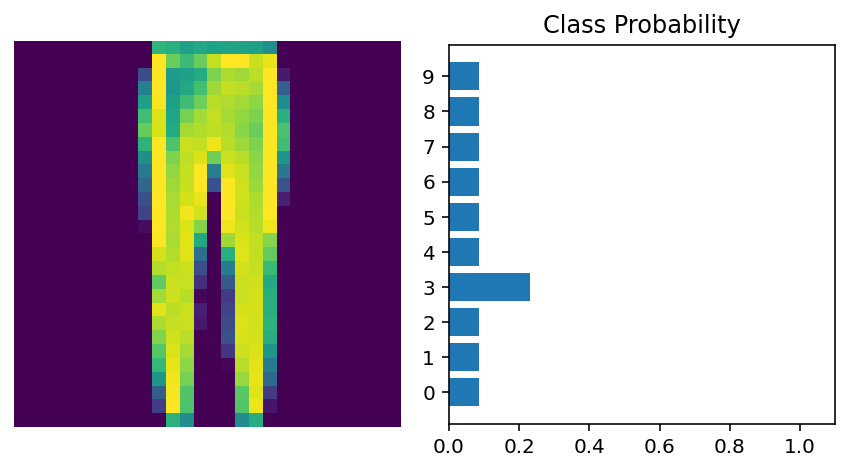

In [111]:
# check predicts well

images, labels = next(iter(testloader))
images.resize_(images.shape[0], 1, 784)
logit = model.forward(images[0,:])
ps = F.softmax(logit, dim =1)
print(ps)
view_classify(images[0].view(1, 28, 28), ps)

In [75]:
# tips for validation
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[8]])


In [76]:
equals = top_class == labels.view(*top_class.shape)

RuntimeError: shape '[1, 1]' is invalid for input of size 64

In [30]:
misclassified = [index for index,value in enumerate(equals) if value.item() is False] 

NameError: name 'equals' is not defined

In [31]:
# compute accuracy

accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

NameError: name 'equals' is not defined

In [ ]:
# save and load model
torch.save(model.state_dict(), 'checkpoint.pth')

In [ ]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

In [ ]:
model.load_state_dict(state_dict)